In [6]:

import sys
Lpath = "/work/sfbeltranv/lya-deltas/bin/"
sys.path.append(Lpath)
from multiprocessing import Pool

from Lya_deltas import *


In [3]:


#####################################
# Load QSO from plates (eBoss)
### Parameters
if 0:
   path_drq       = '/work/sfbeltranv/DR14_mini/DR14Q_v4_4m.fits'
   path_spec      = '/work3/desi_lya/data/eBOSS/dr15_all/spplates'
   path_out        = '/work/sfbeltranv/output/lya-deltas'
   cat_type       = 'eBoss'

# for line correction (later)
#path_lines     = '/work3/desi_lya/data/eBOSS/dr12_all/dr16-line-sky-mask.txt'
else:
# Load QSO from fibers (Desi)
   path_drq      = '/home/sfbeltranv/respaldo/DR14_mini/zcat_m.fits' 
   path_spec     = '/work3/desi_lya/mocks_quick/london/v9.0.0_small/spectra-16'
   path_out = '/work/sfbeltranv/output_deltas/deltas'
   cat_type      = 'Desi'


# 2 to 4
zmin = 2
zmax = 4.288461538461538

lmin = 1040
lmax = 2000

#cont_fit = 'PCA'
cont_fit = 'lin'

# Catalog load
if ( cat_type == 'eBoss'):
   print(cat_type)
   QSOloc, spectra = load_eBoss(path_drq, path_spec, zmin, zmax, lmin, lmax)
   
elif ( cat_type == 'Desi'):
   print(cat_type)
   QSOloc, spectra = load_Desi(path_drq, path_spec, zmin, zmax, lmin, lmax)
   
else:
   print('Wrong catalog type: '+cat_type)

print( 'Done, loaded '+ str( len(spectra)) +' QSO spec. from catalog.'  )
print( 'Calculating Deltas')

if ( cont_fit == 'PCA'):
   dmodel, pcawave, pcaflux, pcaivar, data_meanspec = get_pca(spectra, 10, 10)
   if 0:     # Calculate cont with current catalog data
      mwave11, mmean11, mstd11, mcoeff11, mcontin_mock = get_continuum( pcawave, dmodel.coeff, dmodel.eigvec, data_meanspec)
   else:     # Load continuum from a 300K QSO catalog
      mwave11 = np.load('wave.npy')
      mmean11 = np.load('meanf.npy')
      mstd11 = np.load('meanstd.npy')
      deltas = getdeltas_PCA(spectra, QSOloc, mwave11, mmean11, mstd11 ) 
            #   wave, delta, ivar, flux, cont  = deltas 
elif ( cont_fit == 'lin'):
   deltas = getdeltas_LinMinimize(spectra, QSOloc )
print( 'Done')

import os
if not os.path.exists(path_out):
    os.makedirs(path_out)

      


   

Desi
Found 167 spectra files.

Found 7624 QSO spec. in 164 files.
0: Loading 71 QSO spec. from file: 0
1: Loading 24 QSO spec. from file: 1
2: Loading 60 QSO spec. from file: 2
3: Loading 14 QSO spec. from file: 3
4: Loading 50 QSO spec. from file: 8
5: Loading 26 QSO spec. from file: 9
6: Loading 51 QSO spec. from file: 10
7: Loading 52 QSO spec. from file: 11
8: Loading 1 QSO spec. from file: 12
9: Loading 30 QSO spec. from file: 14
10: Loading 60 QSO spec. from file: 32
11: Loading 51 QSO spec. from file: 33
12: Loading 49 QSO spec. from file: 34
13: Loading 41 QSO spec. from file: 35
14: Loading 53 QSO spec. from file: 36
15: Loading 27 QSO spec. from file: 37
16: Loading 55 QSO spec. from file: 38
17: Loading 49 QSO spec. from file: 39
18: Loading 43 QSO spec. from file: 40
19: Loading 41 QSO spec. from file: 41
20: Loading 42 QSO spec. from file: 42
21: Loading 40 QSO spec. from file: 43
22: Loading 51 QSO spec. from file: 44
23: Loading 54 QSO spec. from file: 45
24: Loading 55 

In [19]:
deltas_orig  = deltas

In [7]:
deltas = putCont(deltas, get_mcont)
deltas = recalcDeltas(deltas)

ll,mcont,wcont = calcMeanCont(deltas) 
newcont = get_mcont(ll) * mcont
get_mcont = interp1d(ll, newcont, fill_value="extrapolate")
print('Mean continuum calculated')

(ll, eta, var_lss, epsilon, num_pixels, var_pipe_values,
                 var_delta, var2_delta, count, num_qso, chi2_in_bin, error_eta,
                 error_var_lss, error_epsilon) = minimizeVariances( deltas )        
w = num_pixels > 0
get_eta = interp1d(ll[w],
                        eta[w],
                        fill_value="extrapolate",
                        kind="nearest")
get_var_lss = interp1d(ll[w],
                        var_lss[w],
                        fill_value="extrapolate",
                        kind="nearest")
get_epsilon = interp1d(ll[w],
                        epsilon[w],
                        fill_value="extrapolate",
                        kind="nearest")

/work/sfbeltranv/lya-deltas/bin/Lya_deltas.py:421: RuntimeWarning: divide by zero encountered in true_divide
  weight = 1 / newc**2 / variance
/work/sfbeltranv/lya-deltas/bin/Lya_deltas.py:421: RuntimeWarning: divide by zero encountered in true_divide
  weight = 1 / newc**2 / variance
/work/sfbeltranv/lya-deltas/bin/Lya_deltas.py:421: RuntimeWarning: divide by zero encountered in true_divide
  weight = 1 / newc**2 / variance
/work/sfbeltranv/lya-deltas/bin/Lya_deltas.py:421: RuntimeWarning: divide by zero encountered in true_divide
  weight = 1 / newc**2 / variance
/work/sfbeltranv/lya-deltas/bin/Lya_deltas.py:423: RuntimeWarning: invalid value encountered in double_scalars
  return chi2_contribution.sum() - np.log(weight).sum()
/work/sfbeltranv/lya-deltas/bin/Lya_deltas.py:423: RuntimeWarning: invalid value encountered in double_scalars
  return chi2_contribution.sum() - np.log(weight).sum()
/work/sfbeltranv/lya-deltas/bin/Lya_deltas.py:421: RuntimeWarning: divide by zero encountered 

/work/sfbeltranv/lya-deltas/bin/Lya_deltas.py:421: RuntimeWarning: divide by zero encountered in true_divide
  weight = 1 / newc**2 / variance
/work/sfbeltranv/lya-deltas/bin/Lya_deltas.py:423: RuntimeWarning: invalid value encountered in double_scalars
  return chi2_contribution.sum() - np.log(weight).sum()
/work/sfbeltranv/lya-deltas/bin/Lya_deltas.py:421: RuntimeWarning: divide by zero encountered in true_divide
  weight = 1 / newc**2 / variance
/work/sfbeltranv/lya-deltas/bin/Lya_deltas.py:423: RuntimeWarning: invalid value encountered in double_scalars
  return chi2_contribution.sum() - np.log(weight).sum()
/work/sfbeltranv/lya-deltas/bin/Lya_deltas.py:421: RuntimeWarning: divide by zero encountered in true_divide
  weight = 1 / newc**2 / variance
/work/sfbeltranv/lya-deltas/bin/Lya_deltas.py:423: RuntimeWarning: invalid value encountered in double_scalars
  return chi2_contribution.sum() - np.log(weight).sum()
/work/sfbeltranv/lya-deltas/bin/Lya_deltas.py:423: RuntimeWarning: inv

/work/sfbeltranv/lya-deltas/bin/Lya_deltas.py:423: RuntimeWarning: invalid value encountered in double_scalars
  return chi2_contribution.sum() - np.log(weight).sum()
/work/sfbeltranv/lya-deltas/bin/Lya_deltas.py:423: RuntimeWarning: invalid value encountered in double_scalars
  return chi2_contribution.sum() - np.log(weight).sum()
/work/sfbeltranv/lya-deltas/bin/Lya_deltas.py:423: RuntimeWarning: invalid value encountered in double_scalars
  return chi2_contribution.sum() - np.log(weight).sum()
/work/sfbeltranv/lya-deltas/bin/Lya_deltas.py:421: RuntimeWarning: divide by zero encountered in true_divide
  weight = 1 / newc**2 / variance
/work/sfbeltranv/lya-deltas/bin/Lya_deltas.py:423: RuntimeWarning: invalid value encountered in double_scalars
  return chi2_contribution.sum() - np.log(weight).sum()
/work/sfbeltranv/lya-deltas/bin/Lya_deltas.py:421: RuntimeWarning: divide by zero encountered in true_divide
  weight = 1 / newc**2 / variance
/work/sfbeltranv/lya-deltas/bin/Lya_deltas.py:

Mean continuum calculated
Calculating deltas
delta 0 of 7624.


TypeError: calcDelta() got an unexpected keyword argument 'mcont'

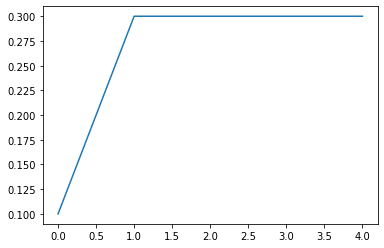

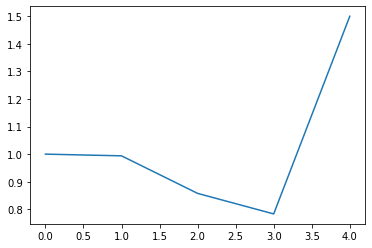

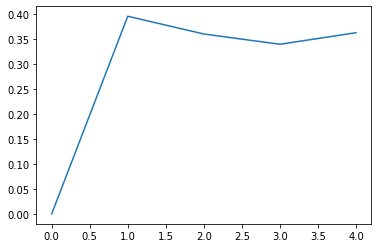

In [15]:
import matplotlib.pyplot as plt

len(epsilon)
plt.plot(var_lss)
plt.show()
len(epsilon)
plt.plot(eta)
plt.show()
len(epsilon)
plt.plot(epsilon)
plt.show()

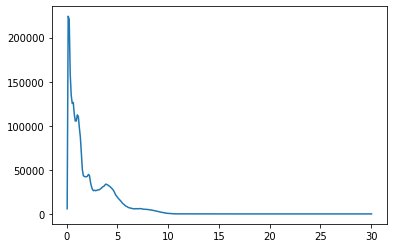

In [17]:
def weightH(deltas):
   dw = .1
   wmax = 30
   wmin = 0
   nstack = int((wmax - wmin)/dw)+1
   w = wmin + ( np.arange(nstack)+0.5 ) * dw
   wcont = np.zeros(nstack)

   # part with the delta for
   for i in range( len(deltas) ):
      wbin =  (deltas[i][2] / dw + dw/2 ).astype(int)
      c = np.bincount( wbin )
      wcont[:len(c)]+=c
   plt.plot( w, wcont )
   plt.show()
weightH(deltas)




In [2]:
Pool.close()

NameError: name 'Pool' is not defined